## Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from timeit import default_timer as timer

## my own functions
from utils import moments_estimate, format_data

import PLN

import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = "cpu"

## Read oaks data set

In [2]:
Y = read_csv('oaks_counts.csv', sep=',').to_numpy()
O = read_csv('oaks_offsets.csv', sep=',').to_numpy()
data = format_data(counts = Y, offsets = np.log(O))

# Initialization of the variational parameters
M0, S0 = moments_estimate(Y, np.log(O))

## Test various optimizer for standard PLN

In [3]:
# Instantiating PLN model with full covariance
myPLN = PLN.full_covariance(data)

### Nlopt solver with CCSAQ on profiled ELBO

In [4]:
start = timer()
# Optimization with the CCSA solver from NLopt
res_nlopt = myPLN.fit_profiled_variational_objective(M0, S0, solver = 'nlopt', ftol = 1e-16)
end = timer()
time_nlopt = end - start

Sigma_profiled = myPLN.Sigma
B_profiled = myPLN.B

### Pytorch solver with RMSProp and auto-grad on profiled ELBO

In [5]:
start = timer()
# Optimization with Rprop solver from Pytorch with autograd
res_torch = myPLN.fit_profiled_variational_objective(M0, S0, solver = 'torch', device = device, lr = 1, nsteps=100, ftol = 1e-3)
end = timer()
time_torch = end - start

Sigma_profiled_torch = myPLN.Sigma
B_profiled_torch = myPLN.B

## Some outputs

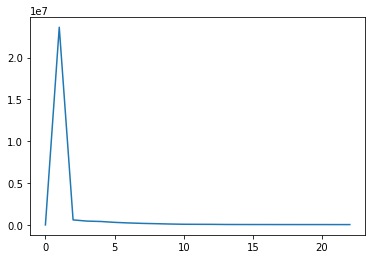

41110.78439741858
26112.19551330985


In [6]:
plt.plot(res_torch['objective'])
plt.show()

print(res_nlopt['criterion'])
print(res_torch['criterion'])
